## 1
## a) SVM classifier has quick training time with large dataset. 

### False 

Traditional Support Vector Machine (SVM) solution suffers from O(n 2) time complexity, which makes it impractical to very large datasets. To reduce its high computational complexity, several data reduction methods are proposed in previous studies. 

To quickly train the SVM
(i)Use Linear SVM
(ii)Use Primal SVM form
(iii)Use scaled data
(iv)Use optimum parameter values.
Explanation:
1. Use Linear SVM (linear Kernels) like LIBLINEAR library. But the conditions to use Linear SVM are that: (a) Data should be linearly separable, otherwise test accuracy could be very low.  You can check whether data is linearly separable  (b) Training time is more important than test accuracy. This is because test accuracy of linear SVM is always less than non-linear SVM.
2. Use Primal SVM for your problem. 
3. Use scaled data .
4. Use optimum values of parameters to get the best result.


## b) SVM classifier does not perform well when number of dimensions are more than number of records.

### False


The reason is that SVM optimization works on the norm of the vectors and not on the dimensions directly. Hence, if there are many zero feature values, the Euclidian length, i.e. the norm, is much less than the number of dimensions.
Kernel models are exactly the same as linear ones, except they first transform the data. We're transforming into an even bigger space, so if you're inputs have 1,000 features (dimensions), the kernel space could be 100,000 or even infinite and all we are really doing is calculating the distance between each data point. The kernel machine then uses those distances as input.
So if you have 12 data points, you have 80 distances between them. It doesn't matter if your data has 5 dimensions or 1,000, you still have only 80 distances.


## c) SVM classifier can handle both linearly and non-linearly separable datasets.

### True

As mentioned above SVM is a linear classifier which learns an (n – 1)-dimensional classifier for classification of data into two classes. However, it can be used for classifying a non-linear dataset. This can be done by projecting the dataset into a higher dimension in which it is linearly separable!
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.


## 2. Do the following on breast cancer dataset. Perform 70:30 train(Tr) and test (Te) split.
## a. Use Tr data for building linear SVM model and evaluate it’s performance (F1 score) using Te data

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import pandas as pd
dataset = pd.read_csv('breast-cancer-wisconsin.data')

In [44]:
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [45]:
# Let's add the columns to the dataset
dataset.columns = ['ID','Radius','Texture','Perimeter','Area','Smoothness','Compactness', 'Concavity','Concave Points', 'Symmetry'
                  , 'Cancer']

In [46]:
dataset.head()

,ID,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Cancer
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [47]:
print("Row, Col", dataset.shape)# (row,col)


('Row, Col', (698, 11))


In [48]:
dataset.describe()

,ID,Radius,Texture,Perimeter,Area,Smoothness,Concavity,Concave Points,Symmetry,Cancer
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [49]:
# Id column is redundant and not useful, we want to drop it
dataset.drop('ID', axis =1, inplace=True)

In [50]:
dataset.shape


(698, 10)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
Radius            698 non-null int64
Texture           698 non-null int64
Perimeter         698 non-null int64
Area              698 non-null int64
Smoothness        698 non-null int64
Compactness       698 non-null object
Concavity         698 non-null int64
Concave Points    698 non-null int64
Symmetry          698 non-null int64
Cancer            698 non-null int64
dtypes: int64(9), object(1)
memory usage: 51.8+ KB


In [52]:
#check for missing variables
dataset.isnull().any()

Radius            False
Texture           False
Perimeter         False
Area              False
Smoothness        False
Compactness       False
Concavity         False
Concave Points    False
Symmetry          False
Cancer            False
dtype: bool

In [53]:
# Drop any duplicates that are present
dataset = dataset.drop_duplicates()

In [54]:
dataset.shape

(463, 10)

In [55]:
dataset.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Cancer
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [57]:
#save the cleaner version of dataframe for future analyis
dataset.to_csv('clean-data.csv')
finalCleanData = pd.read_csv('breast-cancer-wisconsin.data')

In [58]:
# Clean the data for any characters like ? that are seen in the data
indexNames = dataset[ dataset['Compactness'] == '?' ].index
indexNames

Int64Index([22, 39, 138, 144, 157, 163, 234, 248, 274, 291, 293, 296, 314,
            616],
           dtype='int64')

In [59]:
# Delete these row indexes from dataFrame
dataset.drop(indexNames , inplace=True)

In [60]:
dataset.shape

(449, 10)

In [62]:
dataset.columns


Index([u'Radius', u'Texture', u'Perimeter', u'Area', u'Smoothness',
       u'Compactness', u'Concavity', u'Concave Points', u'Symmetry',
       u'Cancer'],
      dtype='object')

In [177]:
# Use the cleaned up data for X and Y
X = dataset.drop(['Cancer'], axis=1)  
y = dataset['Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [178]:
from sklearn.svm import SVC

In [179]:
svc_model = SVC(kernel='linear', random_state=0, gamma=0.1)

In [180]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [181]:
y_pred = svc_model.predict(X_test)

## Summary of Evaluation Metrics for Linear SVM

In [182]:
#Accuracy Score
from sklearn.metrics import accuracy_score
    
acc = accuracy_score(y_test, y_pred, normalize=True)
acc

0.9333333333333333

In [183]:
# Confusion Metrics and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[57  5]
 [ 4 69]]
              precision    recall  f1-score   support

           2       0.93      0.92      0.93        62
           4       0.93      0.95      0.94        73

   micro avg       0.93      0.93      0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



In [184]:

from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
print 'Precision : {}'.format(precision)
print 'Recall    : {}'.format(recall)
print 'F1-score   : {}'.format(fscore)
print 'Support   : {}'.format(support)

Precision : 0.93342933097
Recall    : 0.932280159081
F1-score   : 0.932802389248
Support   : None


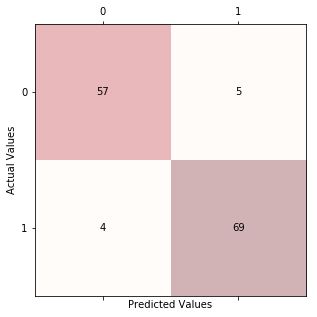

              precision    recall  f1-score   support

           2       0.93      0.92      0.93        62
           4       0.93      0.95      0.94        73

   micro avg       0.93      0.93      0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



In [185]:

import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

## 2 b) Use the same Tr data for building polynomial SVM model and evaluate it’s performance (F1 score) using the same Te data.

In [186]:
# Use the cleaned up data for X and Y
X = dataset.drop(['Cancer'], axis=1)  
y = dataset['Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [187]:
# Using Poly
poly_svc = SVC(kernel='poly', degree=5).fit(X_train, y_train)

In [188]:
y_pred = poly_svc.predict(X_test)

In [189]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[56  6]
 [ 5 68]]
              precision    recall  f1-score   support

           2       0.92      0.90      0.91        62
           4       0.92      0.93      0.93        73

   micro avg       0.92      0.92      0.92       135
   macro avg       0.92      0.92      0.92       135
weighted avg       0.92      0.92      0.92       135



In [190]:
from sklearn.metrics import accuracy_score
    
acc1 = accuracy_score(y_test, y_pred, normalize=True)
acc1

0.9185185185185185

In [191]:
from sklearn.metrics import precision_recall_fscore_support as score
precision1,recall1,fscore1,support1=score(y_test,y_pred,average='macro')
print 'Precision : {}'.format(precision1)
print 'Recall    : {}'.format(recall1)
print 'F1-score   : {}'.format(fscore1)
print 'Support   : {}'.format(support1)


Precision : 0.918475852902
Recall    : 0.917366327883
F1-score   : 0.917869586859
Support   : None


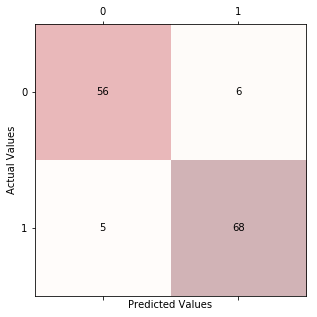

              precision    recall  f1-score   support

           2       0.92      0.90      0.91        62
           4       0.92      0.93      0.93        73

   micro avg       0.92      0.92      0.92       135
   macro avg       0.92      0.92      0.92       135
weighted avg       0.92      0.92      0.92       135



In [192]:
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

## 2 c)  Draw bar chart depicting blue bar for linear SVM and red bar for polynomial SVM, compare their performance based on precision, recall, accuracy and F1-score.  

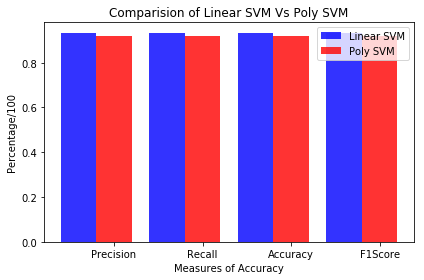

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
means_linearsvm = (precision,recall, acc,fscore)
means_polysvm = (precision1,recall1, acc1,fscore1)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.8

rects1 = plt.bar(index, means_linearsvm, bar_width,
alpha=opacity,
color='b',
label='Linear SVM')

rects2 = plt.bar(index + bar_width, means_polysvm, bar_width,
alpha=opacity,
color='r',
label='Poly SVM')

plt.xlabel('Measures of Accuracy')
plt.ylabel('Percentage/100')
plt.title('Comparision of Linear SVM Vs Poly SVM')
plt.xticks(index + bar_width, ('Precision', 'Recall', 'Accuracy', 'F1Score'))
plt.legend()

plt.tight_layout()
plt.show()